# XGB test


In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

from math import log

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from xgboost import XGBRegressor
import shap


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

from plots2.fns import (
    # standard_layout,
    # corner_annotations_colwise,
    # corner_annotations_rowwise,
    # get_text_annotation,
    get_corner_annotations,
    get_corner_annotations_custom_labels,
    # get_corner_annotations_explicit
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import trait_vec, gamma_dist, object_dump, object_load
# from poly2.shap import get_shap_values_cumulative
# from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture, get_asymptote_config
# from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote

C:\Users\user\anaconda3\envs\poly2\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
from poly2.utils import load_train_test_data, HyperparamsObj
import optuna
from optuna.samplers import TPESampler

# combine hyperparam dfs

In [18]:
def combine_hyperparam_dfs(model):

    df = (
        pd.read_csv(f'../outputs/scores/{model}.csv')
        .join(
            pd.read_csv(f'../outputs/hyperparams/{model}.csv')
        )
        .sort_values('best_cv_score')
    )
    
    print('save')
    df.head(1).to_csv(f'../outputs/hyperparams/best/{model}.csv', index=False)

    return df

In [209]:
hpstr = 'all'

In [210]:
df = combine_hyperparam_dfs(hpstr)

In [211]:
df.head()

,model,default_cv_score,best_cv_score,rmse_test,rmse_train,rmse_test_def,number,max_depth,n_estimators,learning_rate,subsample,colsample_bytree
99,all,0.131867,0.109074,0.107335,0.042964,0.12707,3,10,1740,0.019909,0.546807,0.887985
46,all,0.131867,0.109675,0.107622,0.048611,0.12707,13,11,1504,0.007188,0.703664,0.897356
92,all,0.131867,0.109896,0.106789,0.033212,0.12707,21,11,1312,0.026453,0.504260,0.942453
195,all,0.131867,0.110027,0.107727,0.046411,0.12707,15,11,770,0.015954,0.737537,0.881221
52,all,0.131867,0.110066,0.108242,0.029186,0.12707,3,10,1347,0.048889,0.684228,0.915346


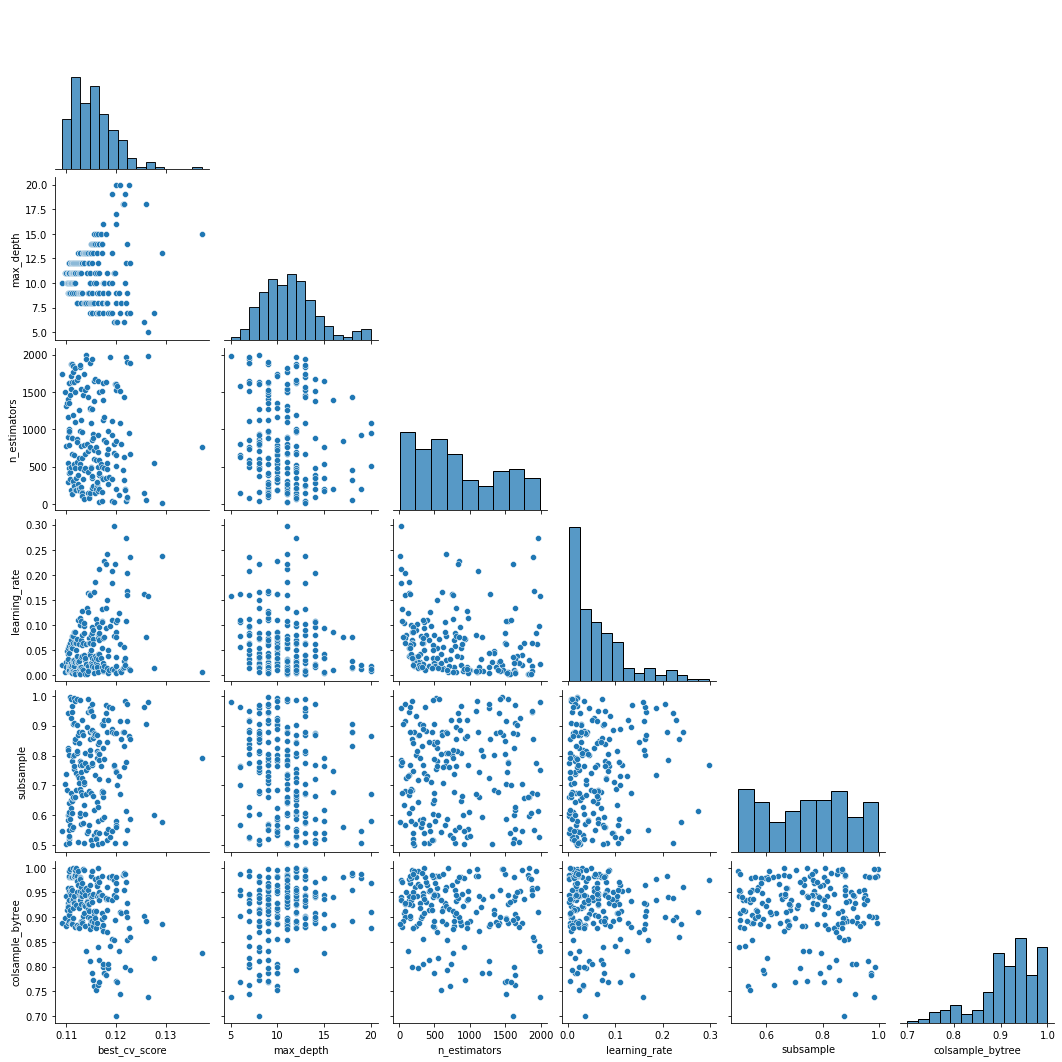

In [194]:
sns.pairplot(
    df.loc[:, [
        'best_cv_score', 
        'max_depth',
        'n_estimators',
        'learning_rate',
        'subsample',
        'colsample_bytree',
    ]],
    corner=True
    # hue='best_cv_score',
    # palette='rocket',
)

# Check for missing indices

In [195]:
model = 'asymp'

In [196]:
hyper = (
    pd.read_csv(f"../outputs/files/{model}_h.csv")
    .sort_values('value')
)

In [197]:
scores = (
    pd.read_csv(f"../outputs/files/{model}_s.csv")
    .sort_values('value')
)

In [198]:
def get_missing_indices(df):
    out = (
        pd.DataFrame(dict(indices=np.arange(200)))
        .assign(exists = lambda x: x.indices.isin(df.value))
        .loc[lambda x: ~x.exists]
    )
    
    return out

In [199]:
s = get_missing_indices(scores)

In [200]:
h = get_missing_indices(hyper)

In [201]:
todo = pd.concat([s, h]).drop_duplicates()
todo

,indices,exists
10,10,False
11,11,False
57,57,False
60,60,False
66,66,False
127,127,False


In [202]:
todo.to_csv(f'../outputs/todo/{model}.csv', index=False)